In [1]:
import numpy as np
import os
import dataprovider3 as dp3
from dataprovider3 import emio

base_dir = '~/Data_local/datasets/pinky/ground_truth/stitched_vol40-vol41/padded_z32_y512_x512'
base_dir = os.path.expanduser(base_dir)

# Input
fname = os.path.join(base_dir, 'img.h5')
img = emio.imread(fname).astype('float32') / 255.0

# Target
fname = os.path.join(base_dir, 'seg.h5')
seg = emio.imread(fname)

# Mask
fname = os.path.join(base_dir, 'msk.h5')
msk = emio.imread(fname)

/usr/people/kisuk/miniconda2/envs/conda36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib inline

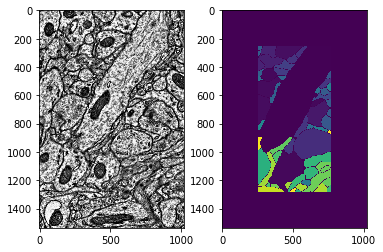

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(img[1,:,:], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(seg[1,:,:])
plt.show()

In [4]:
# Create dataset.
z = 20
y = x = 384
spec = dict(img=(z,y,x), seg=(z,y,x))
dset = dp3.Dataset(spec)
dset.add_data('img', img)
dset.add_data('seg', seg)
dset.add_mask('msk', msk, loc=True)

In [5]:
# Save sample in h5.
def save_sample(fname, sample):
    import h5py
    with h5py.File(fname, 'w') as f:
        for k in sample:
            f.create_dataset(k, data=sample[k])

In [6]:
import augmentor as aug

# Augmentor.
warp = aug.Warp(do_twist=False, rot_max=45.0, shear_max=0.0, scale_max=1.1, stretch_max=0.0)

In [12]:
# warp_params = dict(rot=0.0, shear=0.0, scale=(1,1,1), stretch=(0,0,0,0), twist=0.0)
# warp_params['rot'] = 45.0
# warp_params['shear'] = 9.0
# warp_params['scale'] = (0.9, 0.9, 1.0)
# print(warp_params)

new_spec = warp.prepare(spec, imgs=['img'])
print(new_spec['img'])
print(new_spec['seg'])
sample = dset(spec=new_spec)
save_sample('sample.h5', sample)

(array([ 20, 538, 538]), 23.56498673871784, 0.0, (0.9396425269815555, 0.9396425269815555, 1), array([-0., -0.,  0., -0.]), 0.0)
(20, 538, 538)
(20, 538, 538)


In [13]:
import imageio

img = sample['img']
images = []
for z in range(img.shape[-3]):
    images.append((img[0,z,:,:] * 255).astype('uint8'))
imageio.mimsave('before.gif', images)

In [14]:
sample = warp(sample, imgs=['img'])
print(sample['img'].shape)
print(sample['seg'].shape)
save_sample('sample_warp.h5', sample)

(1, 20, 384, 384)
(1, 20, 384, 384)


In [15]:
import imageio

img = sample['img']
images = []
for z in range(img.shape[-3]):
    images.append((img[0,z,:,:] * 255).astype('uint8'))
imageio.mimsave('after.gif', images)